In [161]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.callbacks import EarlyStopping
import keras.backend as k

In [162]:
df = pd.read_csv("data/cansim.csv")

In [163]:
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


In [164]:
df['Adjustments'] = pd.to_datetime(df['Adjustments'])+MonthEnd(1)
df = df.set_index('Adjustments')
df.head()

,Unadjusted,Seasonally adjusted
Adjustments,,
1991-01-31,12588862,15026890
1991-02-28,12154321,15304585
1991-03-31,14337072,15413591
1991-04-30,15108570,15293409
1991-05-31,17225734,15676083


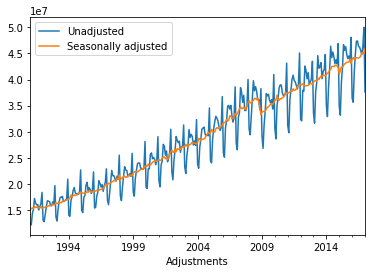

In [165]:
df.plot()

In [166]:
split_date = pd.Timestamp('01-01-2011')

In [167]:
train = df.loc[:split_date,['Unadjusted']]
test = df.loc[split_date:,['Unadjusted']]

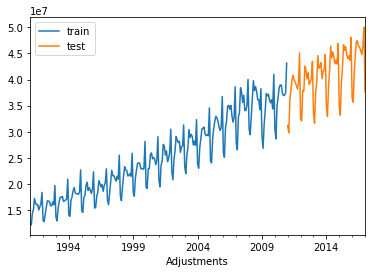

In [168]:
ax= train.plot()
test.plot(ax=ax)
plt.legend(['train','test'])

In [169]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [170]:
X_train = train_sc[:-1]
y_train = train_sc[1:]
X_test = test_sc[:-1]
y_test = test_sc[1:]


In [171]:
model = Sequential()
model.add(Dense(12,input_dim=1,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
None


In [172]:
def predict(model, xtrain,xtest,ytrain,ytest,batch_size = 2):
    k.clear_session()
    early_stop = EarlyStopping(monitor='loss',patience=1,verbose=1)
    model.fit(xtrain,ytrain,epochs=200,batch_size=batch_size,verbose=1,callbacks=[early_stop])
    y_pred = model.predict(xtest)
    plt.plot(ytest)
    plt.plot(y_pred)

Epoch 1/200
120/120 [==============================] - 0s 683us/step - loss: 0.3929
Epoch 2/200
120/120 [==============================] - 0s 770us/step - loss: 0.1150
Epoch 3/200
120/120 [==============================] - 0s 645us/step - loss: 0.0524
Epoch 4/200
120/120 [==============================] - 0s 641us/step - loss: 0.0398
Epoch 5/200
120/120 [==============================] - 0s 638us/step - loss: 0.0326
Epoch 6/200
120/120 [==============================] - 0s 676us/step - loss: 0.0268
Epoch 7/200
120/120 [==============================] - 0s 672us/step - loss: 0.0224
Epoch 8/200
120/120 [==============================] - 0s 673us/step - loss: 0.0189
Epoch 9/200
120/120 [==============================] - 0s 676us/step - loss: 0.0164
Epoch 10/200
120/120 [==============================] - 0s 767us/step - loss: 0.0148
Epoch 11/200
120/120 [==============================] - 0s 655us/step - loss: 0.0136
Epoch 12/200
120/120 [==============================] - 0s 654us/step - lo

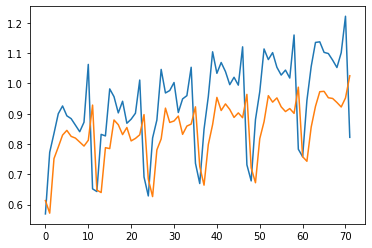

In [173]:
predict(model,X_train,X_test,y_train,y_test)

In [174]:
model = Sequential()
model.add(LSTM(6,input_shape=(1,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6)                 192       
_________________________________________________________________
dense (Dense)                (None, 1)                 7         
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/200
239/239 [==============================] - 0s 1ms/step - loss: 0.1382
Epoch 2/200
239/239 [==============================] - 0s 1ms/step - loss: 0.0443
Epoch 3/200
239/239 [==============================] - 0s 1ms/step - loss: 0.0343
Epoch 4/200
239/239 [==============================] - 0s 1ms/step - loss: 0.0279
Epoch 5/200
239/239 [==============================] - 0s 1ms/step - loss: 0.0224
Epoch 6/200
239/239 [==============================] - 0s 1ms/step - loss: 0.0176
Epoch 7/200
239/239 [==============================] - 0s 1ms/step - loss: 0.0141
Epoch 8/200
239/239 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 9/200
239/239 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 10/200
239/239 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 11/200
239/239 [==============================] - 0s 1ms/step - loss: 0.0101
Epoch 12/200
239/239 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 13/200


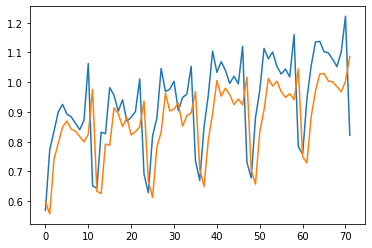

In [175]:
predict(model,X_train[:,None],X_test[:,None],y_train,y_test,1)

In [176]:
train_scaled = pd.DataFrame(train_sc,columns=['scaled'],index=train.index)
test_scaled = pd.DataFrame(test_sc,columns=['scaled'],index=test.index)

In [177]:
for s in range(1,13):
    train_scaled[f"shift_{s}"]=train_scaled['scaled'].shift(s)
    test_scaled[f"shift_{s}"]=test_scaled['scaled'].shift(s)

In [178]:
train_scaled.head(10)

,scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,,
1991-01-31,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-31,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-30,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-31,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-31,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN
1991-09-30,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.01402,NaN,NaN,NaN,NaN


In [179]:
X_train = train_scaled.dropna().drop('scaled',axis=1)
y_train = train_scaled.dropna()[['scaled']]
X_test = test_scaled.dropna().drop('scaled',axis=1)
y_test = test_scaled.dropna()[['scaled']]

In [180]:
X_train

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,
1992-01-31,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020
1992-02-29,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000
1992-03-31,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426
1992-04-30,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318
1992-05-31,0.109831,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628
...,...,...,...,...,...,...,...,...,...,...,...,...
2010-08-31,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290,0.773687,0.754447,0.770968
2010-09-30,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290,0.773687,0.754447
2010-10-31,0.799167,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290,0.773687


In [181]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

In [182]:
model = Sequential()
model.add(Dense(12,input_dim=12,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/200
228/228 [==============================] - 0s 680us/step - loss: 0.0167
Epoch 2/200
228/228 [==============================] - 0s 694us/step - loss: 0.0130
Epoch 3/200
228/228 [==============================] - 0s 673us/step - loss: 0.0109
Epoch 4/200
228/228 [==============================] - 0s 752us/step - loss: 0.0095
Epoch 5/200
228/228 [==============================] - 0s 733us/step - loss: 0.0074
Epoch 6/200
228/228 [==============================] - 0s 716us/step - loss: 0.0067
Epoch 7/200
228/228 [==============================] - 0s 678us/step - loss: 0.0060
Epoch 8/200
228/228 [==============================] - 0s 867us/step - loss: 0.0057
Epoch 9/200
228/228 [==============================] - 0s 739us/step - loss: 0.0049
Epoch 10/200
228/228 [==============================] - 0s 714us/step - loss: 0.0043
Epoch 11/200
228/228 [==============================] - 0s 733us/step - loss: 0.0037
Epoch 12/200
228/228 [==============================] - 0s 810us/step - lo

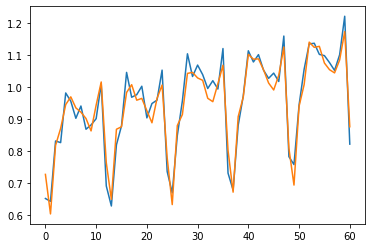

In [183]:
predict(model,X_train,X_test,y_train,y_test,1)

In [184]:
X_train_t = X_train.reshape(X_train.shape[0],1,12)
X_test_t = X_test.reshape(X_test.shape[0],1,12)

In [185]:
X_train_t.shape

(228, 1, 12)

In [186]:
model = Sequential()
model.add(LSTM(6,input_shape=(1,12)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6)                 456       
_________________________________________________________________
dense (Dense)                (None, 1)                 7         
Total params: 463
Trainable params: 463
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/200
228/228 [==============================] - 0s 1ms/step - loss: 0.1223
Epoch 2/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 3/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 4/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 5/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 6/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 7/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 8/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 9/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 10/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 11/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 12/200
228/228 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 13/200


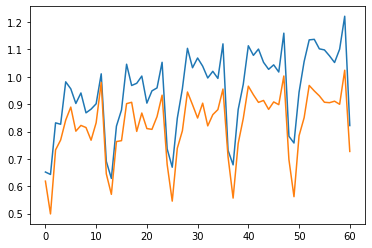

In [187]:
predict(model,X_train_t,X_test_t,y_train,y_test,1)